<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d9/Accor_Logo_2020.png" alt="Logo Alt Text" width="200" height="200"/>
<br>

## **ACCOR NLP Assignment**

The THEHOTEL.com team has approached you to gain deeper insights into guest experiences across their hotels. They are particularly interested in understanding the sentiments expressed in the reviews and identifying areas for improvement, especially in negative reviews. The team aims to categorize the reviews into different topics to streamline their focus on specific aspects of guest satisfaction.

**1. General EDA:**<br>
Begin with a comprehensive exploratory data analysis (EDA) to get an overview of the dataset. Explore key statistics, distributions, and trends in the provided features such as Review created, Type of trip, Your gender identity, and Your age group. Visualize patterns and relationships that might provide initial insights into guest behavior and preferences.

**2. Sentiment Analysis:**<br>
Perform sentiment analysis on the Text column to determine the overall sentiment of each review. Assign a positive or negative status based on the sentiment score. This will help ACCOR to quickly gauge the overall satisfaction level of their guests.

**3. Identifying Complaints in Negative Reviews:**<br>
Focus specifically on negative reviews and analyze the common themes of guest complaints. Identify keywords, phrases, or topics that appear frequently in negative reviews to pinpoint areas that need attention and improvement.

**4. Brand-wise Complaint Analysis:**<br>
Break down the negative reviews by the Hotel_Code to understand if there are specific brands or hotels that receive more complaints. This will enable ACCOR to address issues at a more granular level and tailor improvements to each brand's unique challenges.

**5. Topic Extraction:**<br>
Utilize natural language processing (NLP) techniques to extract topics from the reviews. Categorize the reviews into 4 to 6 different topics such as service quality, cleanliness, amenities, etc. This will provide a structured framework for understanding the diverse aspects of guest experiences.

**6. Topic Classification Model:**<br>
Train a machine learning classification model on the processed data to predict the topic of a given review. This will allow ACCOR to automate the categorization of new reviews and efficiently allocate resources to address specific areas highlighted by guest feedback.

By focusing on negative reviews, categorizing complaints by brand, and extracting meaningful topics, ACCOR aims to proactively enhance guest satisfaction and address issues that matter the most to their customers.


**Provided dataset contains the following columns:**
- Hotel_Code: A unique number assigned for each hotel.
- Review created: The date were the review was done by Guests.
- Language: The language for the provided review.
- Text: The review.
- Type of trip: Declaration of the Guest's purpose of stay.
- Your gender identity: Gender
- Your age group: Age group

# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = f"{os.getcwd()}/reviews.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group
0,0,2023-06-30,0,en,"Well appointed lobby and comfortable stay ,no ...",business,Male,35-54
1,1,2023-06-30,1,en,Stayed because of meet the buyer.\nA bit quirk...,business,Female,65+
2,2,2023-06-30,0,en,There was no service at the bar on the ground ...,business,Male,65+
3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday le...,couple,Female,35-54
4,4,2023-06-28,2,en,Customer service amazing no job to big .Always...,family,Male,35-54


# 1. General EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47741 entries, 0 to 47740
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Hotel_Code            47741 non-null  int64 
 1   Review created        47741 non-null  object
 2   Hotel_Brand           47741 non-null  int64 
 3   Language              47741 non-null  object
 4   Text                  47741 non-null  object
 5   Type of trip          47741 non-null  object
 6   Your gender identity  47274 non-null  object
 7   Your age group        45199 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.9+ MB


In [6]:
data.nunique()

Hotel_Code               3300
Review created             56
Hotel_Brand                38
Language                    2
Text                    47545
Type of trip                5
Your gender identity        4
Your age group              5
dtype: int64

In [7]:
# Print each column's unique values 
columns = ['Hotel_Code', 'Review created', 'Hotel_Brand', 'Language',
       'Type of trip', 'Your gender identity', 'Your age group']

for i in columns:
    print(f"{i} : {data[i].unique()}")

Hotel_Code : [   0    1    2 ... 3297 3298 3299]
Review created : ['2023-06-30' '2023-06-28' '2023-06-27' '2023-06-26' '2023-06-25'
 '2023-06-23' '2023-06-22' '2023-06-21' '2023-06-20' '2023-06-19'
 '2023-06-18' '2023-06-17' '2023-06-16' '2023-06-15' '2023-06-14'
 '2023-06-13' '2023-06-12' '2023-06-11' '2023-06-10' '2023-06-09'
 '2023-06-08' '2023-06-07' '2023-06-06' '2023-06-05' '2023-06-04'
 '2023-06-03' '2023-06-01' '2023-05-31' '2023-05-30' '2023-05-29'
 '2023-05-28' '2023-05-27' '2023-05-25' '2023-05-24' '2023-05-23'
 '2023-05-22' '2023-05-21' '2023-05-20' '2023-05-19' '2023-05-16'
 '2023-06-29' '2023-06-24' '2023-06-02' '2023-05-26' '2023-05-18'
 '2023-05-17' '2023-05-15' '2023-05-01' '2023-05-03' '2023-05-07'
 '2023-05-05' '2023-05-08' '2023-05-04' '2023-05-06' '2023-05-02'
 '2023-05-09']
Hotel_Brand : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Language : ['en' 'fr']
Type of trip : ['business' 'couple' 'fa

In [8]:
#Look into how many null value in gender and age columns
print("< Number of null value in gender and age >")
print(f"Gender: {len(data[data['Your gender identity'].isnull()])}")
print(f"Age: {len(data[data['Your age group'].isnull()])}")

print(f"Percentage of removal of null value from data: {(len(data[data['Your gender identity'].isnull()]) + len(data[data['Your age group'].isnull()]) - len(data[data['Your gender identity'].isnull() & data['Your age group'].isnull()]))/len(data)}")

< Number of null value in gender and age >
Gender: 467
Age: 2542
Percentage of removal of null value from data: 0.05730923105925724


**Remove 5.3% data points from dataset is generally manageable.**

In [9]:
data = data[data['Your gender identity'].notnull() & data['Your age group'].notnull()]
data

,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group
0,0,2023-06-30,0,en,"Well appointed lobby and comfortable stay ,no ...",business,Male,35-54
1,1,2023-06-30,1,en,Stayed because of meet the buyer.\nA bit quirk...,business,Female,65+
2,2,2023-06-30,0,en,There was no service at the bar on the ground ...,business,Male,65+
3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday le...,couple,Female,35-54
4,4,2023-06-28,2,en,Customer service amazing no job to big .Always...,family,Male,35-54
...,...,...,...,...,...,...,...,...
47734,392,2023-05-22,10,en,The the service provided is considered minimal...,single,Female,35-54
47736,376,2023-05-22,8,en,Door doesn't work. It's locks you insider . G...,business,Male,35-54
47737,387,2023-05-21,0,en,1 night. Comfy beds,family,Female,55-64
47738,2534,2023-05-21,0,fr,J’avais précisé une chambre au calme en bout d...,family,Male,35-54


## Plots

In [ ]:
sns.set_style("whitegrid")

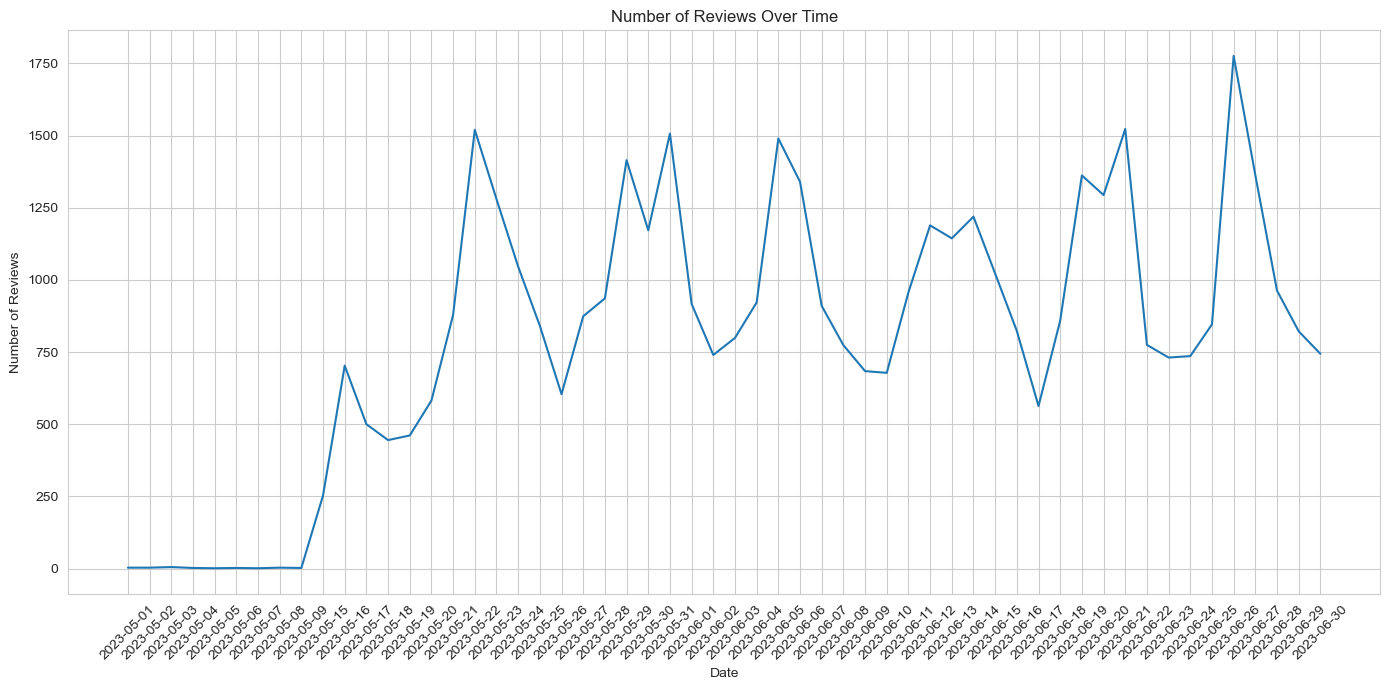

In [10]:
# Distribution of reviews over time
plt.figure(figsize=(14, 7))
reviews_over_time = data['Review created'].value_counts().sort_index()
sns.lineplot(x=reviews_over_time.index, y=reviews_over_time.values)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

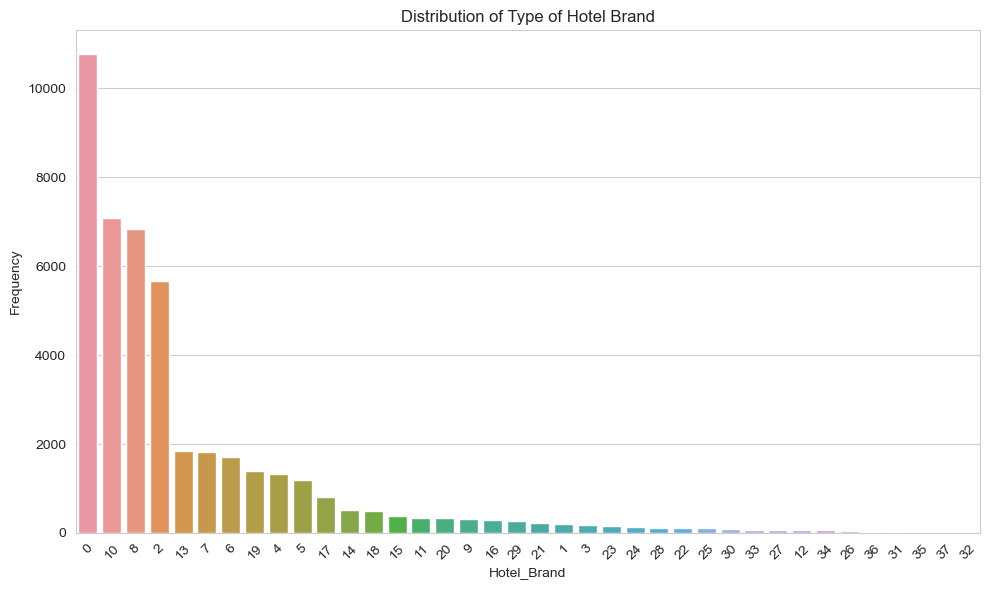

In [11]:
# Distribution of Hotel Brand
plt.figure(figsize=(10, 6))
sns.countplot(x='Hotel_Brand', data=data, order = data['Hotel_Brand'].value_counts().index)
plt.title('Distribution of Type of Hotel Brand')
plt.xlabel('Hotel_Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

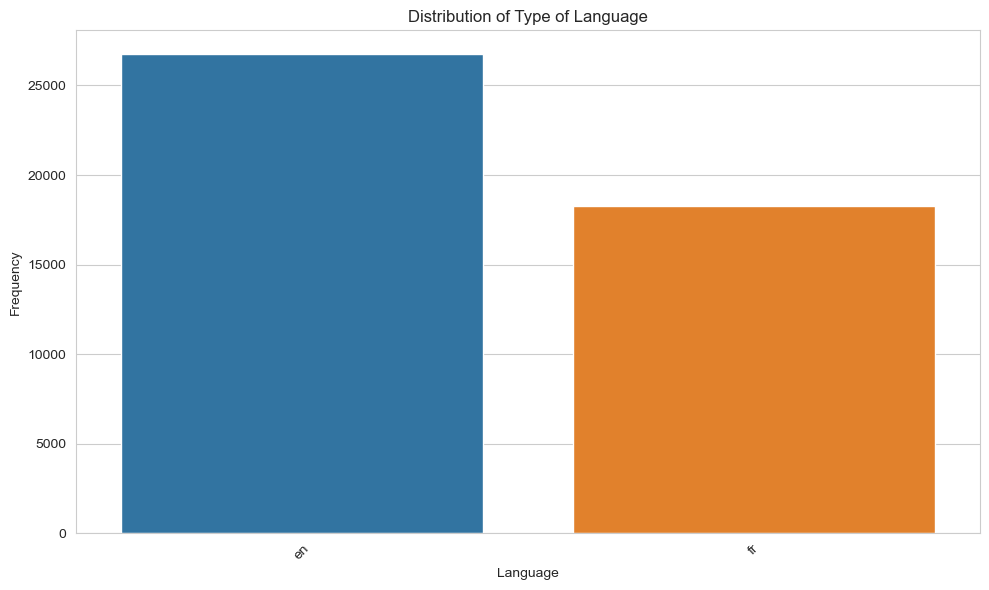

In [12]:
# Distribution of language
plt.figure(figsize=(10, 6))
sns.countplot(x='Language', data=data, order = data['Language'].value_counts().index)
plt.title('Distribution of Type of Language')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

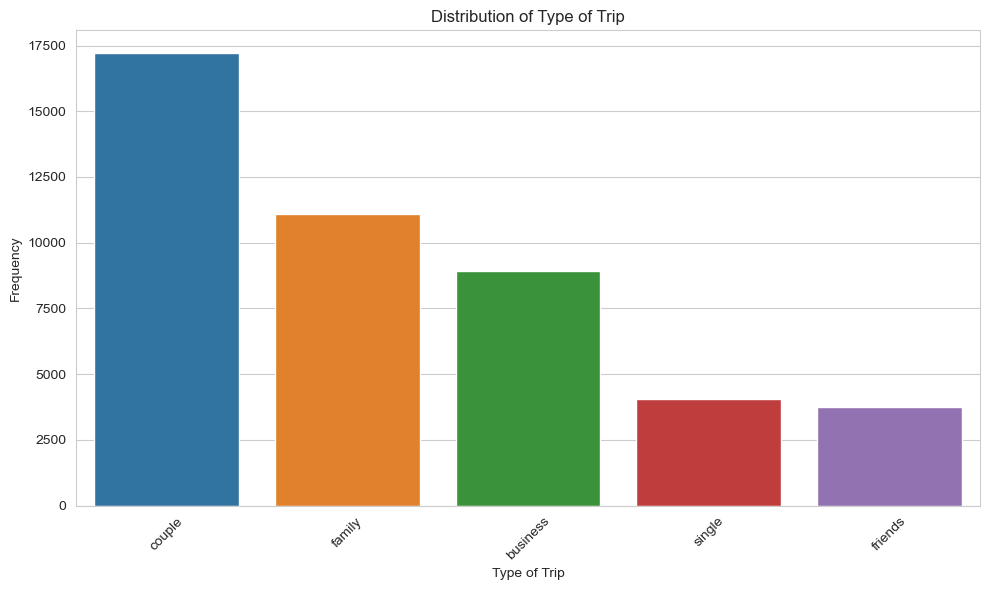

In [13]:
# Distribution of type of trip
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of trip', data=data, order = data['Type of trip'].value_counts().index)
plt.title('Distribution of Type of Trip')
plt.xlabel('Type of Trip')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

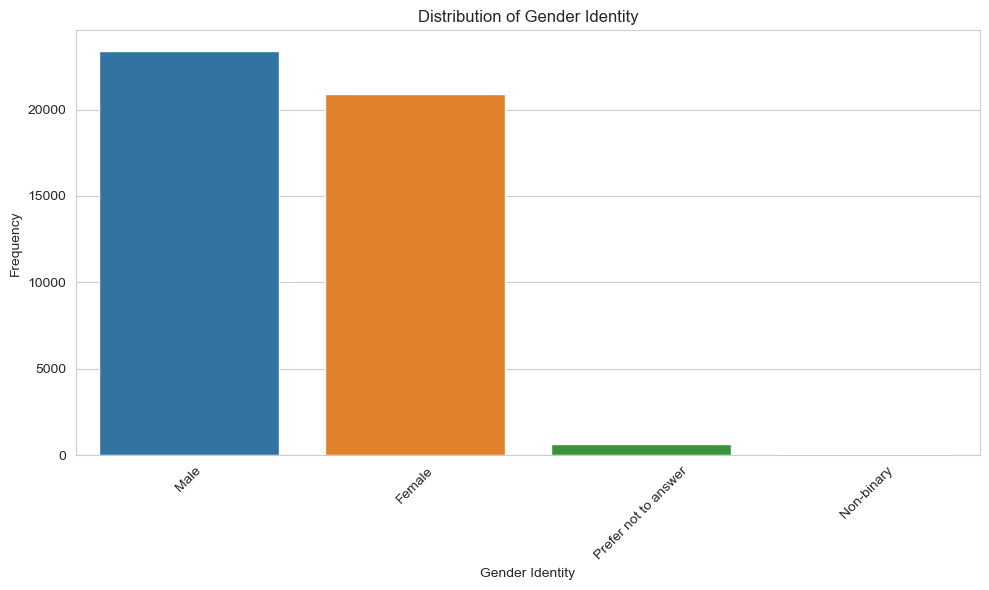

In [14]:
# Distribution of gender identity
plt.figure(figsize=(10, 6))
sns.countplot(x='Your gender identity', data=data, order = data['Your gender identity'].value_counts().index)
plt.title('Distribution of Gender Identity')
plt.xlabel('Gender Identity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

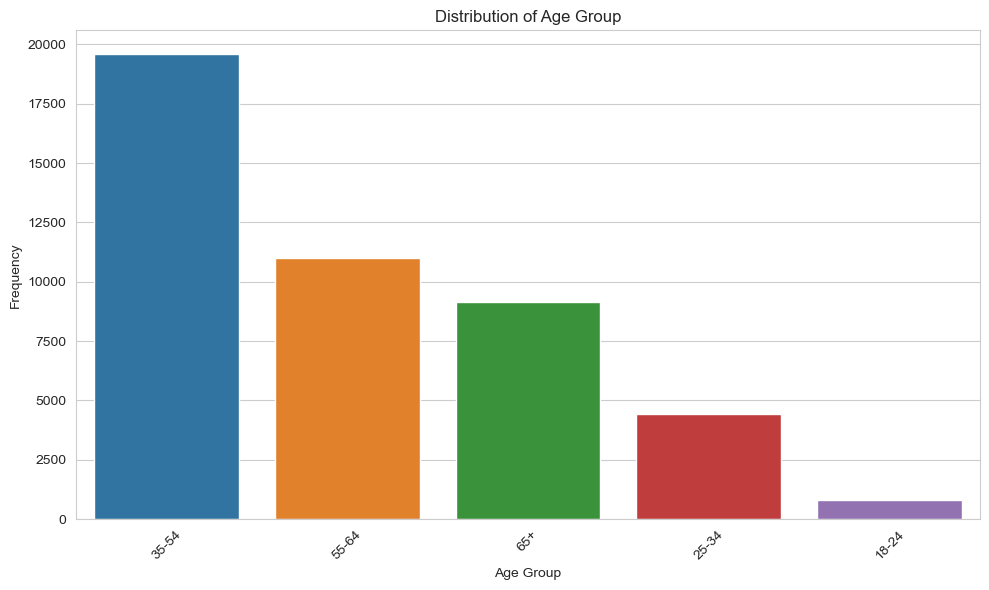

In [15]:
# Distribution of age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Your age group', data=data, order = data['Your age group'].value_counts().index)
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sentiment Analysis

In [16]:
from textblob import TextBlob
# Define a function to calculate sentiment polarity
def get_sentiment(text):
    # Use TextBlob to get the polarity of the text
    polarity = TextBlob(text).sentiment.polarity
    # Return sentiment based on polarity
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

In [17]:
# Apply the function to the 'Text' column to get the sentiment of each review
data['Sentiment'] = data['Text'].apply(get_sentiment)

In [18]:
data.head()

,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group,Sentiment
0,0,2023-06-30,0,en,"Well appointed lobby and comfortable stay ,no ...",business,Male,35-54,positive
1,1,2023-06-30,1,en,Stayed because of meet the buyer.\nA bit quirk...,business,Female,65+,positive
2,2,2023-06-30,0,en,There was no service at the bar on the ground ...,business,Male,65+,neutral
3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday le...,couple,Female,35-54,negative
4,4,2023-06-28,2,en,Customer service amazing no job to big .Always...,family,Male,35-54,positive


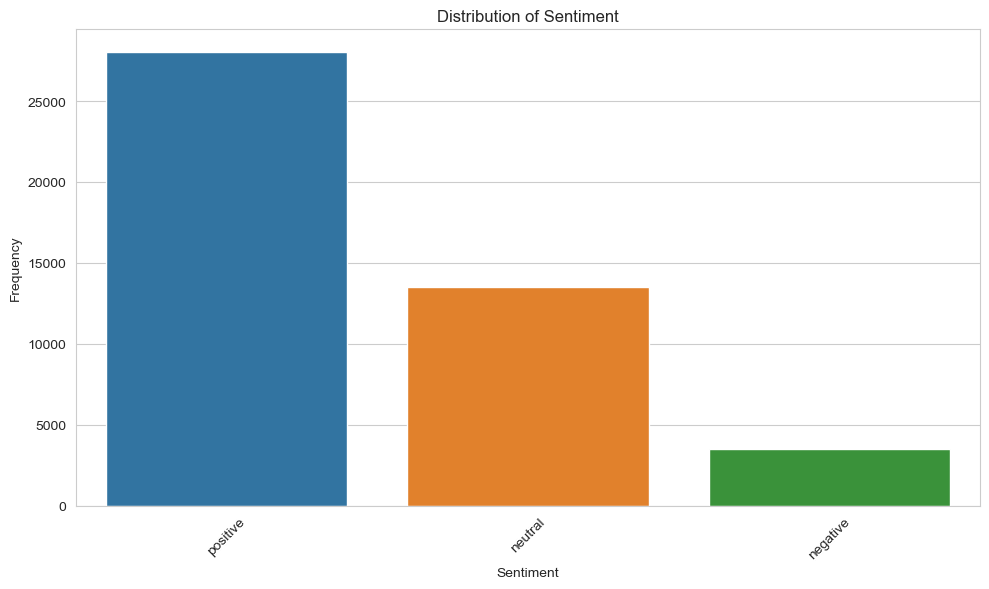

In [32]:
# Distribution of Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data, order = data['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

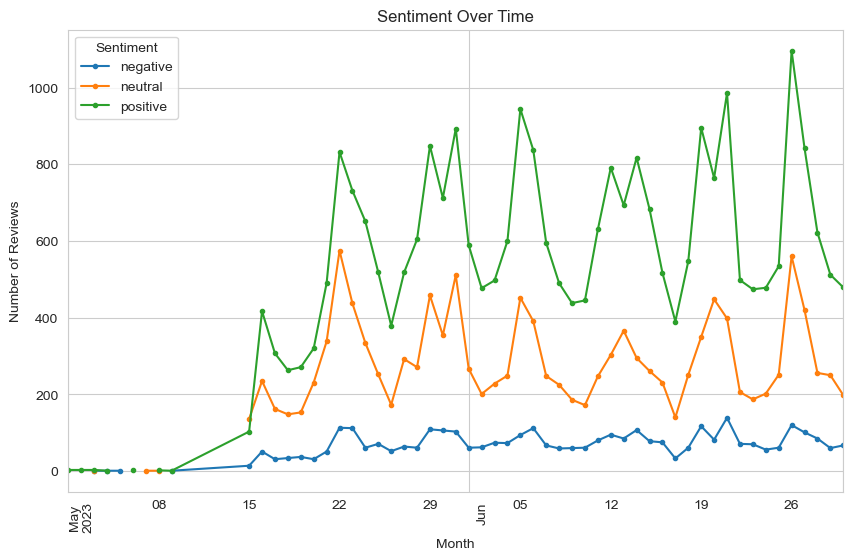

In [34]:
# Group by review creation date and sentiment, then count the number of each sentiment
sentiment_over_time = data.groupby([data['Review created'].dt.to_period('D'), 'Sentiment']).size().unstack()

# Plot a line chart
sentiment_over_time.plot(kind='line', figsize=(10, 6), marker='.')
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

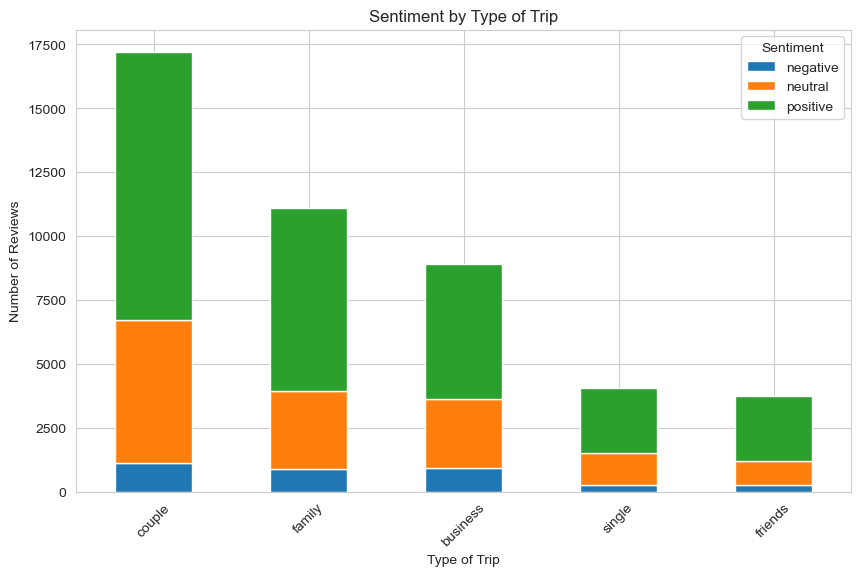

In [38]:
# For sentiment by Type of Trip
sentiment_by_trip_type = data.groupby('Type of trip')['Sentiment'].value_counts().unstack()
sorted_trip_type = sentiment_by_trip_type.reindex(sentiment_by_trip_type.sum(axis=1).sort_values(ascending=False).index)

# Plot a stacked bar chart
sorted_trip_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Type of Trip')
plt.xlabel('Type of Trip')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

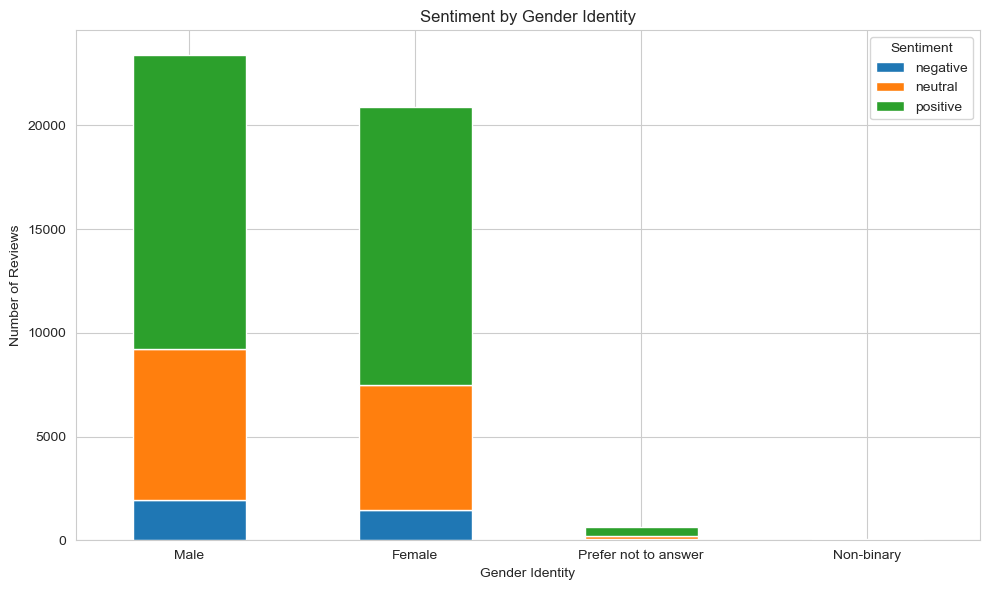

In [41]:
# Sort the counts within each gender identity in descending order
sentiment_by_gender = data.groupby('Your gender identity')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_by_gender = sentiment_by_gender.loc[sentiment_by_gender.sum(axis=1).sort_values(ascending=False).index]

# Plot a stacked bar chart
sentiment_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Gender Identity')
plt.xlabel('Gender Identity')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()

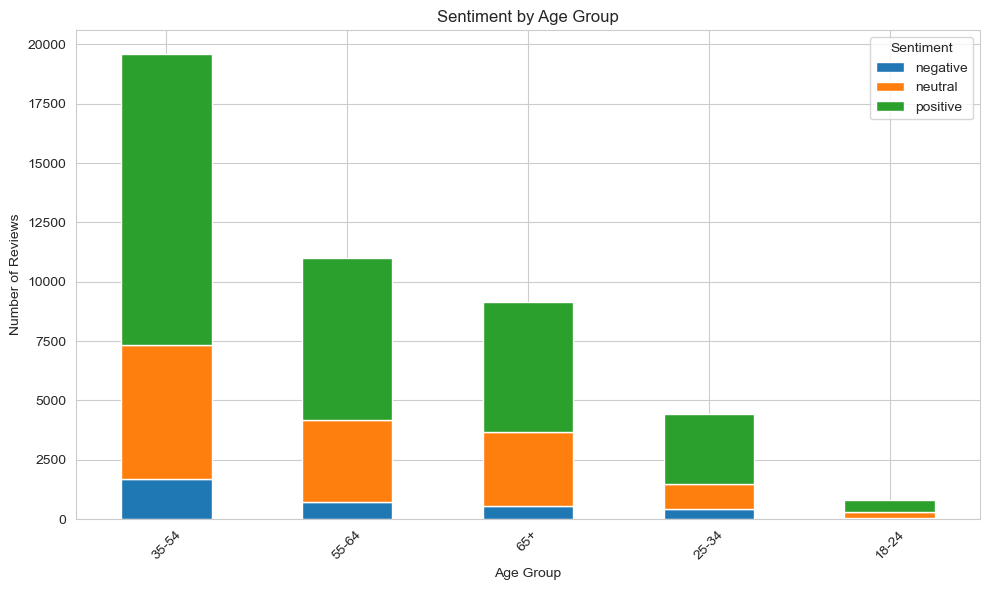

In [42]:
# Sort the counts within each age group in descending order
sentiment_by_age_group = data.groupby('Your age group')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_by_age_group = sentiment_by_age_group.loc[sentiment_by_age_group.sum(axis=1).sort_values(ascending=False).index]

# Plot a stacked bar chart
sentiment_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()

In [40]:
# Save the dataframe with the sentiment to a new CSV file for further analysis
output_file_path = f'{path}'
data.to_csv(output_file_path, index=False)

## Negative Reviews Analysis

In [98]:
neg_data = data[(data['Sentiment'] == 'negative')]

### EDA for negative reviews

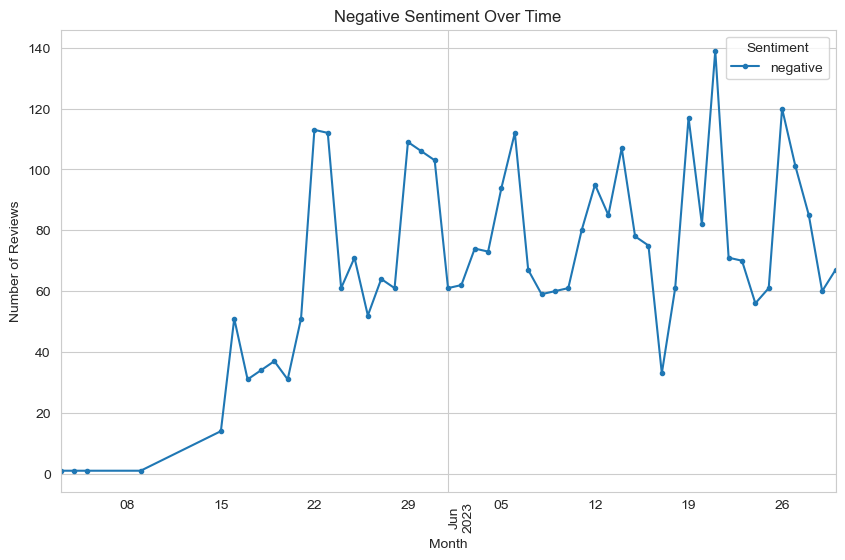

In [103]:
sentiment_over_time = neg_data.groupby([neg_data['Review created'].dt.to_period('D'), 'Sentiment']).size().unstack()

# Plot a line chart
sentiment_over_time.plot(kind='line', figsize=(10, 6), marker='.')
plt.title('Negative Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

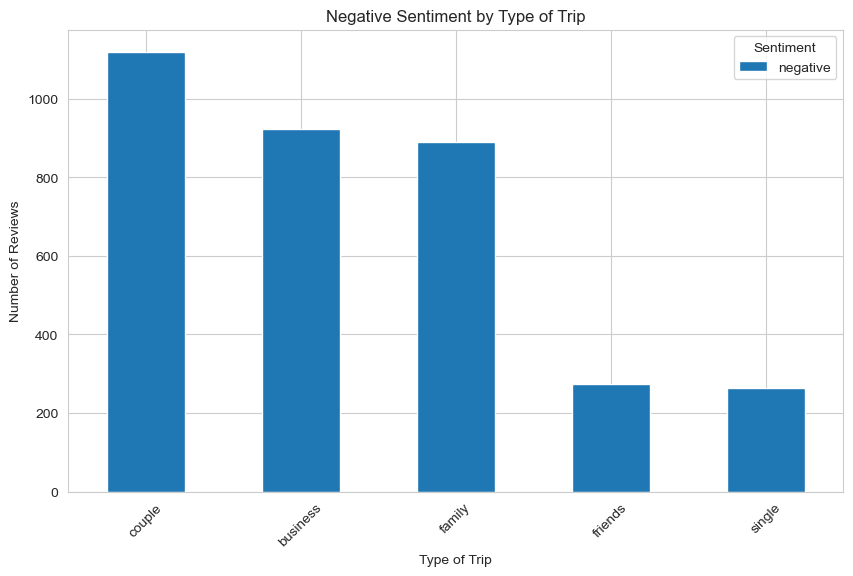

In [104]:
# For sentiment by Type of Trip
sentiment_by_trip_type = neg_data.groupby('Type of trip')['Sentiment'].value_counts().unstack()
sorted_trip_type = sentiment_by_trip_type.reindex(sentiment_by_trip_type.sum(axis=1).sort_values(ascending=False).index)

# Plot a stacked bar chart
sorted_trip_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Negative Sentiment by Type of Trip')
plt.xlabel('Type of Trip')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

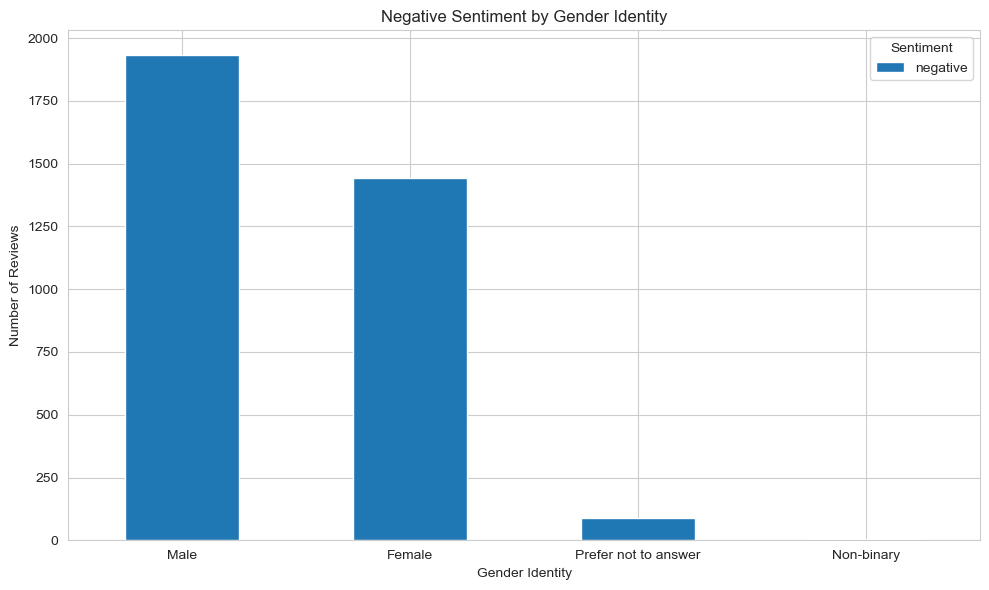

In [105]:
# Sort the counts within each gender identity in descending order
sentiment_by_gender = neg_data.groupby('Your gender identity')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_by_gender = sentiment_by_gender.loc[sentiment_by_gender.sum(axis=1).sort_values(ascending=False).index]

# Plot a stacked bar chart
sentiment_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Negative Sentiment by Gender Identity')
plt.xlabel('Gender Identity')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()

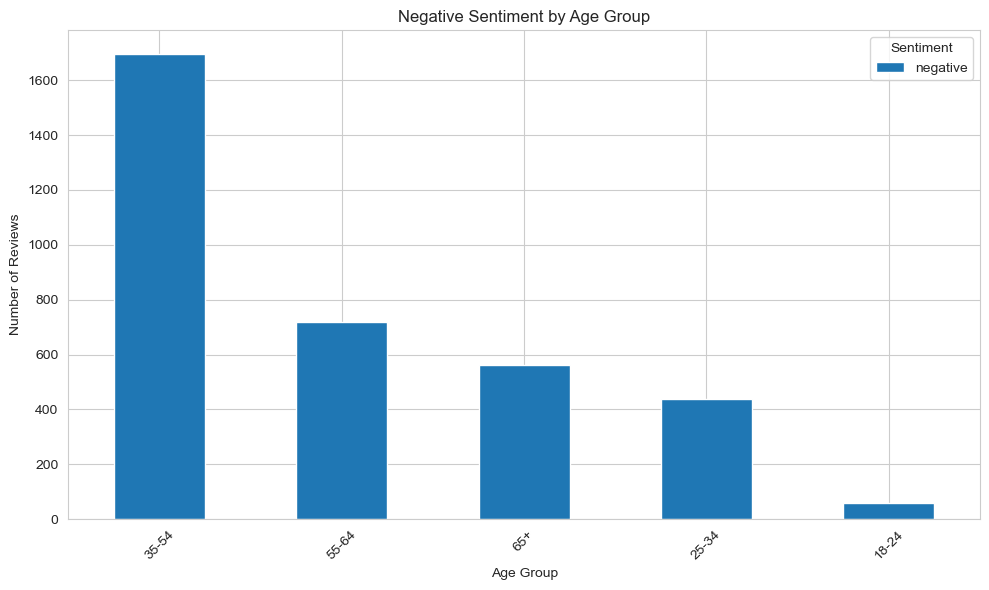

In [106]:
# Sort the counts within each age group in descending order
sentiment_by_age_group = neg_data.groupby('Your age group')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_by_age_group = sentiment_by_age_group.loc[sentiment_by_age_group.sum(axis=1).sort_values(ascending=False).index]

# Plot a stacked bar chart
sentiment_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Negative Sentiment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()

### Negative Topics Detection

In [100]:
negative_reviews = neg_data['Text']

pd.set_option('display.max_colwidth', None)  # Set to None for no truncation
negative_reviews.head(3)

3     We stayed for the weekend. Arrived Saturday left Sunday. Room 509 with small balcony but perfectly centered with sunset. Shame cranes and buildings blocked it partially. Living doors blocked well excessive noise from the pool and restaurant terrace below. Bed was super comfy. Sofa bed was horrible as sofa. We were 2 and only used bed. Enough room for 2 and our big dog. Kitchenette without utensils so pretty much useless. We used the mini-fridge to keep drinks cool. No vending machine. So only option was room service or hotel restaurant. Parking was chaotic due to construction? Still looks like very little for amount of rooms. There is a gated parking garage underground. Breakfast was standard for 3 star hotel. Close to English breakfast (bacon scrambled eggs and beans). Understaffed in reception and in restaurant during morning service and check out. 15 euros charge per night for dog.
20                                                                                              

#### Single word (unigram) to detect the topic

[nltk_data] Downloading package stopwords to /Users/Wayne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


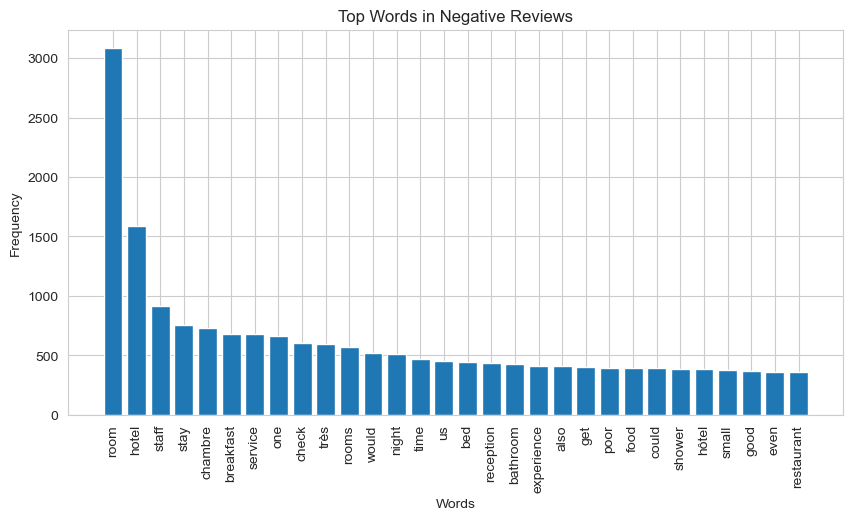

In [82]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Download stop words from NLTK
nltk.download('stopwords')

# Get English and French stop words
english_stop_words = list(stopwords.words('english'))
french_stop_words = list(stopwords.words('french'))
combined_stop_words = english_stop_words+french_stop_words

# Now, we will use CountVectorizer to identify the most common words in negative reviews.
# We will exclude common English stop words.
vec = CountVectorizer(stop_words=combined_stop_words, max_features=100).fit(negative_reviews)
bag_of_words = vec.transform(negative_reviews)
sum_words = bag_of_words.sum(axis=0) 

# Now, we will sort them by frequency.
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert this to a DataFrame for easy plotting.
keywords_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])

# Plotting the top 30 words.
top_n = 30
plt.figure(figsize=(10, 5))
plt.bar(keywords_df['Word'][:top_n], keywords_df['Frequency'][:top_n])
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#### Combination of 2 or 3 words (unigram) to detect the more detail in phrases

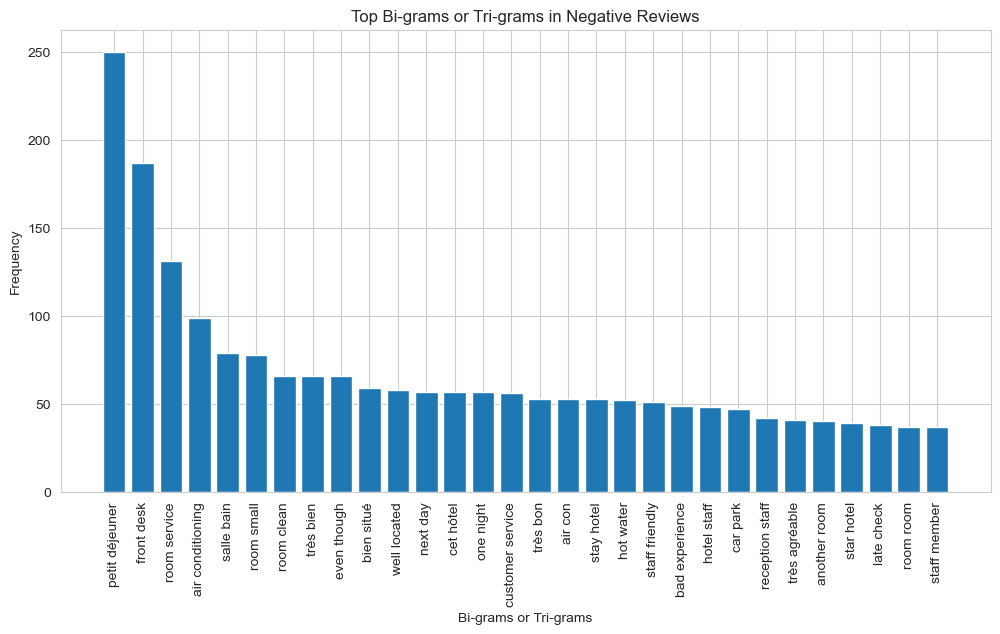

In [97]:
# Set up CountVectorizer to use bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2),  # Use (2, 2) for bi-grams and tri-grams
                             stop_words=combined_stop_words, 
                             max_features=50)  # Adjust max_features to get more or fewer phrases

# Apply the vectorizer to the negative reviews
X = vectorizer.fit_transform(negative_reviews)

# Sum up the counts of each bi-gram
word_counts = X.sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame for easy plotting
df_words = pd.DataFrame(words_freq, columns=['Bi-gram', 'Frequency'])

# Plot the top bi-grams and tri-grams in negative reviews
top_n = 30
plt.figure(figsize=(12, 6))
plt.bar(df_words['Bi-gram'][:top_n], df_words['Frequency'][:top_n])
plt.title('Top Bi-grams or Tri-grams in Negative Reviews')
plt.xlabel('Bi-grams or Tri-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()